# The Basics of Linear Regression
This notebook covers the fundamentals of linear regression in machine learning. In this project we look at the following:
- Data Preparation
- Split Dataset for Machine Learning
- Train the model
- compute the mean square error
- Compute the $R^2$ 


We will go ahead by importing the neccessary python libraries. Because this covers the fundamentals, we will not be using sicit-learn, rather we will code directly using the normal equation 

## About the data set
We are going to be using a car data set. it has the following features

- `Make`: Manufacturer/brand of the vehicle.

- `Model`: Specific vehicle model name.

- `Year`: Year the vehicle was manufactured.

- `Engine Fuel Type`: Type of fuel used by the vehicle’s engine.

- `Engine HP`: Horsepower of the engine (measure of power).

- `Engine Cylinders`: Number of cylinders in the engine.

- `Transmission Type`: Type of transmission system.

- `Driven_Wheels`: Which wheels receive engine power (drive configuration).

- `Number of Doors`: Total number of doors on the vehicle.

- `Market Category`: Marketing classification of the car (often multiple categories).

- `Vehicle Size`: Size classification of the vehicle.

- `Vehicle Style`: Style or body type of the vehicle.

- `Highway MPG`: Fuel efficiency in miles per gallon on highways.

- `City MPG`: Fuel efficiency in miles per gallon in city driving.

- `Popularity`: Popularity score (measured by dataset provider, usually sales-based).

- `MSRP`: Manufacturer’s Suggested Retail Price (vehicle price at release, USD).


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("data/car_sales.csv")
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


Data assessments

In [3]:
print("The data shape",df.shape)
df.info()

The data shape (11914, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  


In [4]:
# Check for fileds that contain missing values
df_na=df.isnull().sum()
df_na[df_na>0]


Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

In [5]:
df.dtypes[df.dtypes=='object']

Make                 object
Model                object
Engine Fuel Type     object
Transmission Type    object
Driven_Wheels        object
Market Category      object
Vehicle Size         object
Vehicle Style        object
dtype: object

# Data Wrangling
**Observations**
- inconsistent colum names
- Some fields contains missing values

**Action**
- convert fields snake_case
- fill missing values with 0. (0 in this case means the field is not present as we attempt to train our model) 
- Split dataframe into training (60%),test (20%) and validation set (20%)
- create a function that prepare the data

**Optional Objective**
We'll be creating a function that prepares our dataframe, this way the originality of the dataframe is preservedPlan


In [6]:
# rename columns
df.columns=df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
# Nomalize the  strings in the dataframe
string_cols=list(df.dtypes[df.dtypes=='object'].index)
for col in string_cols:
  df[col]=df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


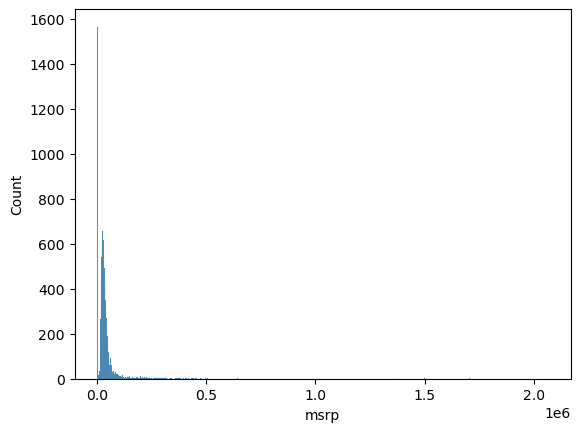

In [8]:
# Assess the distribution of the dependent variable, msrp 
sns.histplot(df.msrp);

> It seems the majority of the data is concentrated betwen $0.0e^6$ and $0.5e^6$
> We'll limit the data to about $1.0e^6$ for clearer view of the distribution. However, it can be observed that the data is right skewed

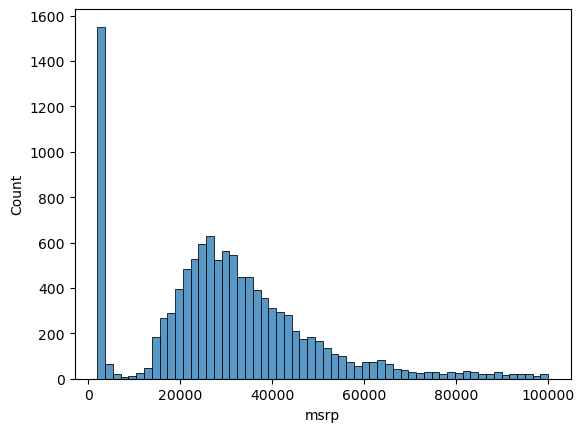

In [9]:
sns.histplot(df.msrp[df.msrp<100000]);

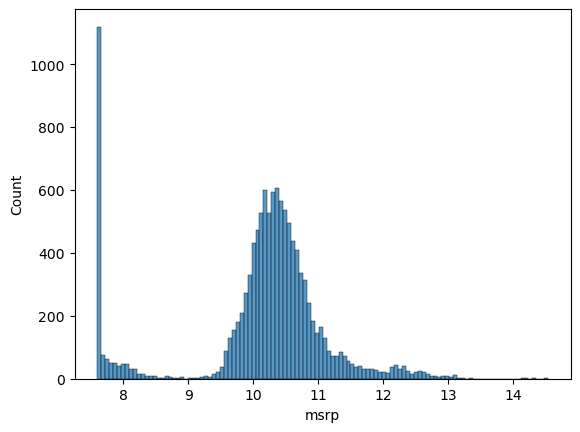

In [10]:
# scale the price
sns.histplot(np.log1p(df.msrp));

# Train, Test and Validation data set set up

In [11]:
# validation framework
n=  len(df) # total number of records
n_val=int(n*0.2) # validation set of total
n_test=int(n*0.2) # test set of total
n_train=n-n_val-n_test #training set of total

print(n_train,n_val,n_test)

# Test if any set is out of range
assert((n_train+n_val+n_test)==n)

7150 2382 2382


In [22]:
# shuffule dataframe to minimize bias
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
df2=df.iloc[idx] # shuffled dataframe

#split data
df_val=df2.iloc[:n_val]
df_test=df2.iloc[n_val:n_val+n_test] 
df_train=df2.iloc[n_val+n_test:]

assert (n_train,n_val,n_test)==(len(df_train),len(df_val),len(df_test))

In [23]:
# reset index
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

#set up dependent variable y
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)
y_train=np.log1p(df_train.msrp.values)

# **Linear Regression**

$$g(x_i)=W_0 +W_1x_1+W_2x_2+W_3x_3...W_nx_n$$

$$g(x_i)=W_0+\sum_{j=1}^nW_jx_j$$

$$g(x_i)= W_0 +x_i^T.W$$

$$ W=(X^TX)^{-1}X^Ty$$

In [24]:
# Linear regression
def linear_regression(X,y):
  ones=np.ones(X.shape[0])
  X=np.column_stack([ones,X])
  XTX=X.T.dot(X)
  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv.dot(X.T).dot(y)
  return w_full[0],w_full[1:]

In [25]:
def prepare_X(df):
  df=df.copy()
  df['age']=2017-df.year
  base=['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

  features=base.copy()
  features.append('age')
  for v in [2,3,4]:
    df['num_doors_%s' %v]=(df.number_of_doors==v).astype(int)
    features.append('num_doors_%s' %v)

  df_num=df[features]
  df_num=df_num.fillna(0)
  X=df_num.values
  return X

In [26]:
# create independent variables of respective set
X_train=prepare_X(df_train)
X_test=prepare_X(df_test)
X_val=prepare_X(df_val)

In [27]:
# obtain the optimum weights of constants
w0,w=linear_regression(X_train,y_train)


print(w0,w)
# predict price
y_pred=w0+ X_train.dot(w)

10.577718992879094 [ 3.59716199e-03  8.11053037e-02 -3.86669708e-03  1.08693520e-02
 -4.47346439e-05 -9.34763472e-02 -1.18925728e+00 -1.40361268e+00
 -1.23993383e+00]


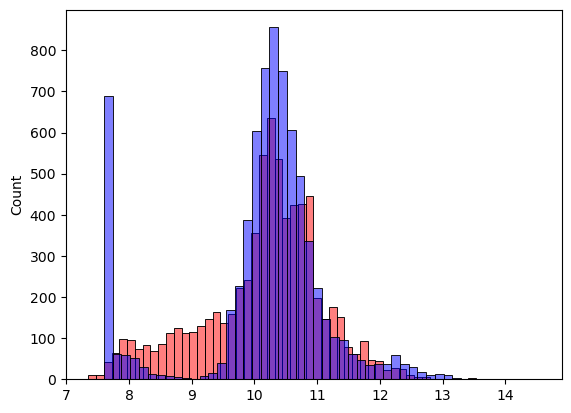

In [28]:
sns.histplot(y_pred,color='red',bins=50,alpha=0.5)
sns.histplot(y_train,color='blue',bins=50,alpha=0.5)
plt.show()

$$RMSE=1/m\sum_{j=1}^ng(x_i)-y_i$$

In [29]:
def rmse(y,y_pred):
  error=y-y_pred
  se=error**2
  mse=se.mean()
  return np.sqrt(mse)


rmse(y_train,y_pred)

0.5119486369713488

In [30]:
X_val=prepare_X(df_val)
w0,w=linear_regression(X_val,y_val)
y_pred=w0+ X_val.dot(w)
rmse(y_val,y_pred)

0.5188957899700228

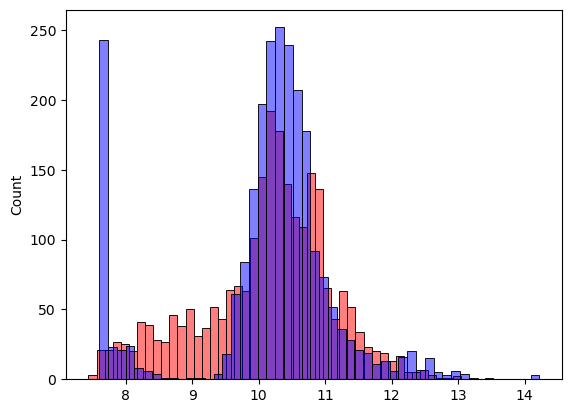

In [31]:
sns.histplot(y_pred,color='red',bins=50,alpha=0.5)
sns.histplot(y_val,color='blue',bins=50,alpha=0.5)
plt.show()